In [1]:
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import SGDClassifier

from data_utils import *
from models_utils import *
from pkl_utils import *

In [2]:
df = get_raw_data('../data/allNamesClean.csv')

In [3]:
df_translit_ru = filter_data(df)

# No aggregation

Training best model and testing it

In [4]:
le, X_train, X_test, y_train, y_test = split_data(df_translit_ru)

In [5]:
clf = Pipeline(steps=[
    ('vect', TfidfVectorizer(analyzer='char', ngram_range=(1, 5), max_df=0.45, min_df=1, lowercase=False)),
    ('estimator', SGDClassifier(alpha=1e-05, class_weight=None, early_stopping=False, loss='modified_huber', 
                                penalty='elasticnet', random_state=0))])

In [6]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(analyzer='char', lowercase=False, max_df=0.45,
                                 ngram_range=(1, 5))),
                ('estimator',
                 SGDClassifier(alpha=1e-05, loss='modified_huber',
                               penalty='elasticnet', random_state=0))])

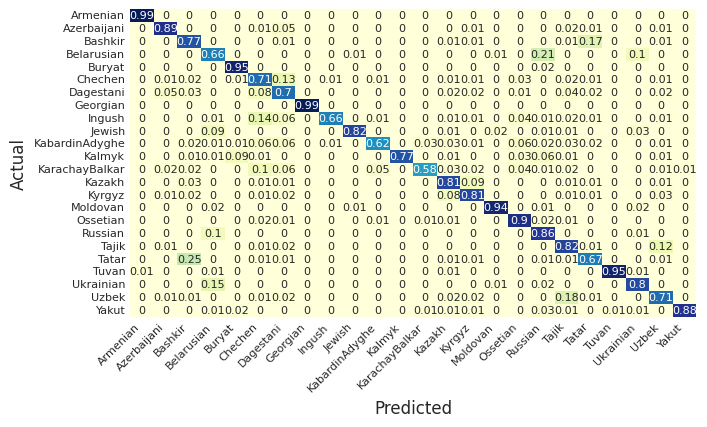

Ethnos          Acc	Prec	Rec	F1
Armenian       	0.9992	0.9894	0.9936	0.9915
Azerbaijani    	0.9904	0.8853	0.8891	0.8872
Bashkir        	0.9620	0.7519	0.7702	0.7610
Belarusian     	0.9521	0.7324	0.6609	0.6948
Buryat         	0.9952	0.9371	0.9462	0.9416
Chechen        	0.9817	0.6944	0.7139	0.7040
Dagestani      	0.9729	0.7002	0.7006	0.7004
Georgian       	0.9987	0.9860	0.9916	0.9888
Ingush         	0.9967	0.8739	0.6644	0.7549
Jewish         	0.9933	0.9088	0.8183	0.8612
KabardinAdyghe 	0.9957	0.7543	0.6162	0.6783
Kalmyk         	0.9972	0.9375	0.7732	0.8475
KarachayBalkar 	0.9959	0.8333	0.5822	0.6855
Kazakh         	0.9774	0.8263	0.8059	0.8160
Kyrgyz         	0.9787	0.8275	0.8116	0.8195
Moldovan       	0.9937	0.9391	0.9372	0.9382
Ossetian       	0.9932	0.8602	0.9006	0.8799
Russian        	0.9673	0.7136	0.8628	0.7812
Tajik          	0.9731	0.7645	0.8193	0.7909
Tatar          	0.9651	0.6746	0.6749	0.6748
Tuvan          	0.9984	0.9658	0.9515	0.9586
Ukrainian      	0.9786	0.7953	0.8031	0.7992


{'accuracy': 0.8136887082486582,
 'precision macro': 0.8360972756140409,
 'recall macro': 0.8033483889755081,
 'f1 macro': 0.8169303498061908}

In [7]:
test_model(clf, le, X_test, y_test, 'cm_full.tif')

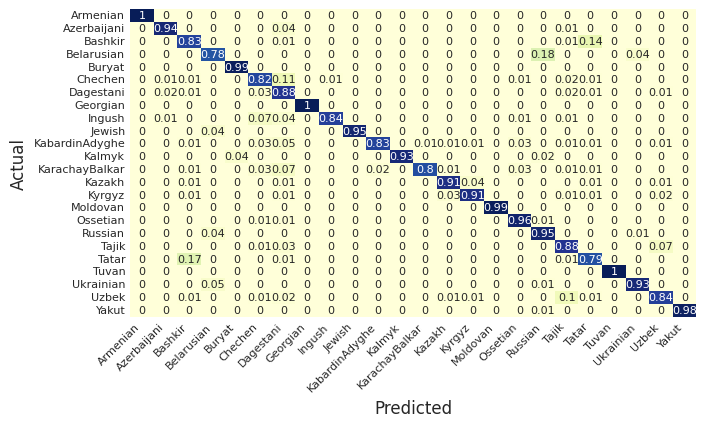

Ethnos          Acc	Prec	Rec	F1
Armenian       	0.9997	0.9962	0.9989	0.9976
Azerbaijani    	0.9945	0.9469	0.9355	0.9411
Bashkir        	0.9730	0.8276	0.8261	0.8269
Belarusian     	0.9767	0.9023	0.7797	0.8365
Buryat         	0.9989	0.9841	0.9922	0.9881
Chechen        	0.9899	0.8440	0.8196	0.8316
Dagestani      	0.9814	0.8158	0.8794	0.8464
Georgian       	0.9999	0.9990	0.9997	0.9994
Ingush         	0.9984	0.9482	0.8407	0.8912
Jewish         	0.9985	0.9839	0.9513	0.9673
KabardinAdyghe 	0.9985	0.9466	0.8337	0.8865
Kalmyk         	0.9991	0.9829	0.9300	0.9557
KarachayBalkar 	0.9984	0.9677	0.8014	0.8768
Kazakh         	0.9922	0.9438	0.9111	0.9272
Kyrgyz         	0.9914	0.9279	0.9129	0.9203
Moldovan       	0.9993	0.9941	0.9907	0.9924
Ossetian       	0.9977	0.9555	0.9636	0.9596
Russian        	0.9806	0.8074	0.9456	0.8710
Tajik          	0.9837	0.8614	0.8771	0.8692
Tatar          	0.9740	0.7692	0.7899	0.7794
Tuvan          	0.9999	0.9979	0.9982	0.9980
Ukrainian      	0.9933	0.9248	0.9341	0.9294


{'accuracy': 0.9018133205873128,
 'precision macro': 0.9241696010421991,
 'recall macro': 0.9053338970993542,
 'f1 macro': 0.9135956169491243}

In [8]:
test_model(clf, le, X_train, y_train)

In [9]:
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

In [10]:
def print_person(X, y_corr, y_pred, probs, le):
    top_inds = probs.argsort()[-3:][::-1]
    ln, fn = X.split('#')
    print(
        'Name: {} {}; true: {}; pred: {}; top 3: {} {:1.4f}, {} {:1.4f}, {} {:1.4f}'.format(
            fn, ln, le.inverse_transform([y_corr])[0], le.inverse_transform([y_pred])[0],
            le.inverse_transform([top_inds[0]])[0], probs[top_inds[0]],
            le.inverse_transform([top_inds[1]])[0], probs[top_inds[1]],
            le.inverse_transform([top_inds[2]])[0], probs[top_inds[2]],
        )
    )
    
    
def show_insecure_correct_preds(X_test, y_test, y_pred, y_prob, le, insecurity=0.5):
    inds = y_pred == y_test
    X_correct = X_test[inds]
    y_correct = y_test[inds]
    y_prob_correct = y_prob[inds]
    cnt = 0
    
    for i in range(len(y_correct)):
        if np.max(y_prob_correct[i]) <= insecurity:
            print_person(X_correct[i], y_correct[i], y_correct[i], y_prob_correct[i], le)
            cnt += 1
    print()        
    print('Number of matches:', cnt)

def show_secure_incorrect_preds(X_test, y_test, y_pred, y_prob, le, security=0.6):
    inds = y_pred != y_test
    X_incorrect = X_test[inds]
    y_true = y_test[inds]
    y_incorrect = y_pred[inds]
    y_prob_incorrect = y_prob[inds]
    cnt = 0
    
    for i in range(len(y_prob_incorrect)):
        if np.max(y_prob_incorrect[i]) >= security:
            print_person(X_incorrect[i], y_true[i], y_incorrect[i], y_prob_incorrect[i], le)
            cnt += 1
    print()        
    print('Number of matches:', cnt)

Looking at model confidence

In [11]:
show_insecure_correct_preds(X_test, y_test, y_pred, y_prob, le, 0.35)

Name: зинаида баглаева; true: Buryat; pred: Buryat; top 3: Buryat 0.3153, Russian 0.2718, Ossetian 0.1560
Name: аделия ибрагимова; true: Bashkir; pred: Bashkir; top 3: Bashkir 0.2922, Dagestani 0.2862, Tatar 0.2849
Name: саша сапаев; true: Russian; pred: Russian; top 3: Russian 0.3438, Chechen 0.2552, Belarusian 0.1995
Name: диана касим; true: Kazakh; pred: Kazakh; top 3: Kazakh 0.2934, Belarusian 0.2262, Moldovan 0.2131
Name: усман тахиров; true: Tajik; pred: Tajik; top 3: Tajik 0.2306, Chechen 0.2303, Azerbaijani 0.2283
Name: азаке ыусупов; true: Kyrgyz; pred: Kyrgyz; top 3: Kyrgyz 0.3380, Tajik 0.3132, Uzbek 0.3039
Name: азамат бакаев; true: Kyrgyz; pred: Kyrgyz; top 3: Kyrgyz 0.3287, Ossetian 0.2921, Bashkir 0.1671
Name: алимхан алиханов; true: Kazakh; pred: Kazakh; top 3: Kazakh 0.3271, Dagestani 0.3047, Chechen 0.2136
Name: агнеса влас; true: Moldovan; pred: Moldovan; top 3: Moldovan 0.2667, Kazakh 0.2590, Jewish 0.1965
Name: сабрина сайдахметова; true: Tajik; pred: Tajik; top 3:

In [12]:
show_secure_incorrect_preds(X_test, y_test, y_pred, y_prob, le, 0.6)

Name: таня бодрова; true: Belarusian; pred: Russian; top 3: Russian 0.6665, Belarusian 0.2203, Ukrainian 0.1132
Name: анастасия гайванович; true: Ukrainian; pred: Belarusian; top 3: Belarusian 0.9979, Tatar 0.0021, Yakut 0.0000
Name: шахбоз эралиев; true: Uzbek; pred: Tajik; top 3: Tajik 0.6967, Uzbek 0.2028, Kyrgyz 0.1005
Name: андрей миров; true: Belarusian; pred: Russian; top 3: Russian 0.6318, Belarusian 0.3347, Ossetian 0.0335
Name: шейх хизриев; true: Chechen; pred: Dagestani; top 3: Dagestani 0.8166, Jewish 0.1094, Chechen 0.0740
Name: кирилл лысков; true: Belarusian; pred: Russian; top 3: Russian 0.8282, Belarusian 0.1718, Yakut 0.0000
Name: али абдуракхманов; true: Dagestani; pred: Uzbek; top 3: Uzbek 0.6116, Dagestani 0.1726, Kyrgyz 0.1524
Name: супьян лабазанов; true: Chechen; pred: Dagestani; top 3: Dagestani 0.6268, Chechen 0.3421, Russian 0.0310
Name: абийир касенов; true: Kyrgyz; pred: Kazakh; top 3: Kazakh 0.7628, Dagestani 0.1501, Kyrgyz 0.0871
Name: бекхруз мустафоев;

Name: гузель нурмухаметова; true: Tatar; pred: Bashkir; top 3: Bashkir 0.6415, Tatar 0.3544, Uzbek 0.0041
Name: яисан усенов; true: Kazakh; pred: Kyrgyz; top 3: Kyrgyz 0.6116, Tajik 0.1521, Russian 0.1308
Name: айрат билалов; true: Bashkir; pred: Tatar; top 3: Tatar 0.6975, Bashkir 0.3025, Yakut 0.0000
Name: лиза налимова; true: Belarusian; pred: Russian; top 3: Russian 0.7478, Uzbek 0.1554, KabardinAdyghe 0.0967
Name: елшат смаганбетов; true: KarachayBalkar; pred: Kazakh; top 3: Kazakh 0.7450, Azerbaijani 0.2550, Yakut 0.0000
Name: содикали рахимбобоев; true: Uzbek; pred: Tajik; top 3: Tajik 0.6430, Uzbek 0.3483, Ukrainian 0.0087
Name: денис ракасовский; true: Russian; pred: Belarusian; top 3: Belarusian 0.7579, Bashkir 0.1567, Jewish 0.0854
Name: иброхим ешдавлатов; true: Uzbek; pred: Tajik; top 3: Tajik 0.8421, Uzbek 0.1579, Yakut 0.0000
Name: богдан коркишко; true: Belarusian; pred: Ukrainian; top 3: Ukrainian 0.7024, Belarusian 0.2596, Ingush 0.0285
Name: марина гарбуз; true: Bela

Name: диана мирная; true: Russian; pred: Belarusian; top 3: Belarusian 0.7064, Moldovan 0.0927, Chechen 0.0853
Name: надежда мандровская; true: Russian; pred: Belarusian; top 3: Belarusian 0.7498, Russian 0.1683, Kalmyk 0.0500
Name: азалия шестакова; true: Tatar; pred: Bashkir; top 3: Bashkir 0.7080, Russian 0.2343, Tatar 0.0577
Name: евгений завьялов; true: Belarusian; pred: Russian; top 3: Russian 0.8320, Belarusian 0.1680, Yakut 0.0000
Name: диана шакун; true: Ukrainian; pred: Belarusian; top 3: Belarusian 0.6725, Kyrgyz 0.0821, Ukrainian 0.0762
Name: евгений таловский; true: Jewish; pred: Belarusian; top 3: Belarusian 0.8153, Russian 0.1568, Chechen 0.0279
Name: шерали таджиев; true: Uzbek; pred: Tajik; top 3: Tajik 0.6894, Uzbek 0.3106, Yakut 0.0000
Name: миля ахмерова; true: Tatar; pred: Bashkir; top 3: Bashkir 0.6199, Tatar 0.3264, Dagestani 0.0537
Name: эльвира хайруллина; true: Bashkir; pred: Tatar; top 3: Tatar 0.6030, Bashkir 0.3970, Yakut 0.0000
Name: касым керимкул; true: 

Name: иван гагарин; true: Belarusian; pred: Russian; top 3: Russian 0.6326, Bashkir 0.2957, Armenian 0.0717
Name: иззатилло шамсиддинов; true: Tajik; pred: Uzbek; top 3: Uzbek 0.7711, Tajik 0.2289, Yakut 0.0000
Name: илля шыпила; true: Belarusian; pred: Ukrainian; top 3: Ukrainian 0.7291, Belarusian 0.0982, Moldovan 0.0964
Name: алия ихсанова; true: Tatar; pred: Bashkir; top 3: Bashkir 0.6655, Tatar 0.3284, Kazakh 0.0061
Name: римма аскарова; true: Tatar; pred: Bashkir; top 3: Bashkir 0.6898, Tatar 0.2677, KarachayBalkar 0.0425
Name: гриша пруцков; true: Russian; pred: Belarusian; top 3: Belarusian 0.6187, Russian 0.2861, Moldovan 0.0952
Name: заур абдурахманов; true: Azerbaijani; pred: Dagestani; top 3: Dagestani 0.6020, Azerbaijani 0.2093, Uzbek 0.1129
Name: юля косынюк; true: Belarusian; pred: Ukrainian; top 3: Ukrainian 0.8579, Kazakh 0.0767, Bashkir 0.0365
Name: валя котенева; true: Belarusian; pred: Russian; top 3: Russian 0.6998, Ossetian 0.1661, Ukrainian 0.1203
Name: магомед а

In [13]:
show_secure_incorrect_preds(X_test, y_test, y_pred, y_prob, le, 0.9)

Name: анастасия гайванович; true: Ukrainian; pred: Belarusian; top 3: Belarusian 0.9979, Tatar 0.0021, Yakut 0.0000
Name: бекхруз мустафоев; true: Uzbek; pred: Tajik; top 3: Tajik 0.9492, Ingush 0.0508, Yakut 0.0000
Name: сабина калдыкова; true: Kyrgyz; pred: Kazakh; top 3: Kazakh 1.0000, Yakut 0.0000, KabardinAdyghe 0.0000
Name: дмитрий кудин; true: Belarusian; pred: Russian; top 3: Russian 0.9058, Belarusian 0.0862, Bashkir 0.0080
Name: голуся ахметгалеева; true: Bashkir; pred: Tatar; top 3: Tatar 1.0000, Yakut 0.0000, KabardinAdyghe 0.0000
Name: азизбек хурамов; true: Tatar; pred: Uzbek; top 3: Uzbek 0.9245, Azerbaijani 0.0295, Tajik 0.0288
Name: светлана боскина; true: Belarusian; pred: Russian; top 3: Russian 0.9686, Belarusian 0.0314, Yakut 0.0000
Name: айбек асирдинов; true: Uzbek; pred: Kyrgyz; top 3: Kyrgyz 0.9085, Uzbek 0.0876, Kazakh 0.0039
Name: айбек мурзаев; true: Kazakh; pred: Kyrgyz; top 3: Kyrgyz 0.9266, Chechen 0.0411, Uzbek 0.0323
Name: бакыт султанов; true: Kazakh; 

In [14]:
le, X_train, X_test, y_train, y_test = split_data(df_translit_ru, test_size=0.0)
clf = Pipeline(steps=[
    ('vect', TfidfVectorizer(analyzer='char', ngram_range=(1, 5), max_df=0.45, min_df=1, lowercase=False)),
    ('estimator', SGDClassifier(alpha=1e-05, class_weight=None, early_stopping=False, loss='modified_huber', 
                                penalty='elasticnet', random_state=0))])
clf.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(analyzer='char', lowercase=False, max_df=0.45,
                                 ngram_range=(1, 5))),
                ('estimator',
                 SGDClassifier(alpha=1e-05, loss='modified_huber',
                               penalty='elasticnet', random_state=0))])

# Aggregated

Same things for aggregated setup

In [9]:
df_agr = df
df_agr.ethn = df.ethn.apply(aggregate_ethnos)
df_translit_ru_agr = filter_data(df_agr)

In [10]:
le_a, X_train_a, X_test_a, y_train_a, y_test_a = split_data(df_translit_ru_agr)

In [11]:
clf_agr = Pipeline(steps=[
    ('vect', TfidfVectorizer(analyzer='char', ngram_range=(1, 5), max_df=0.45, min_df=1, lowercase=False)),
    ('estimator', SGDClassifier(alpha=1e-05, class_weight=None, early_stopping=False, loss='modified_huber', 
                                penalty='elasticnet', random_state=0))])

In [12]:
clf_agr.fit(X_train_a, y_train_a)

Pipeline(steps=[('vect',
                 TfidfVectorizer(analyzer='char', lowercase=False, max_df=0.45,
                                 ngram_range=(1, 5))),
                ('estimator',
                 SGDClassifier(alpha=1e-05, loss='modified_huber',
                               penalty='elasticnet', random_state=0))])

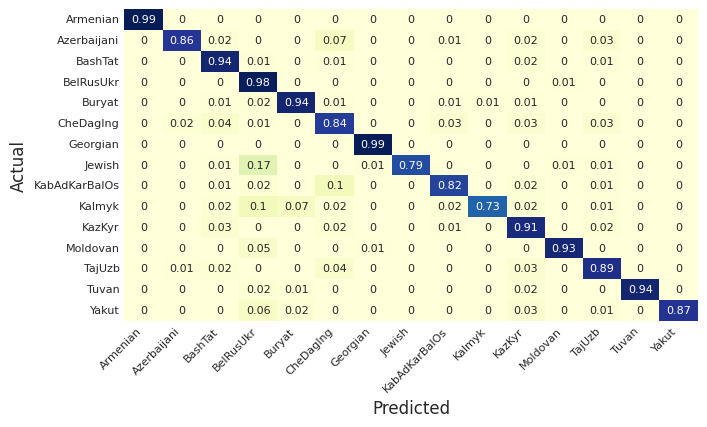

Ethnos          Acc	Prec	Rec	F1
Armenian       	0.9992	0.9905	0.9942	0.9924
Azerbaijani    	0.9904	0.9071	0.8645	0.8853
BashTat        	0.9812	0.9193	0.9401	0.9296
BelRusUkr      	0.9833	0.9388	0.9817	0.9598
Buryat         	0.9957	0.9564	0.9380	0.9471
CheDagIng      	0.9688	0.7972	0.8367	0.8165
Georgian       	0.9990	0.9884	0.9939	0.9912
Jewish         	0.9934	0.9423	0.7877	0.8581
KabAdKarBalOs  	0.9872	0.8738	0.8217	0.8469
Kalmyk         	0.9970	0.9524	0.7330	0.8284
KazKyr         	0.9778	0.9027	0.9148	0.9087
Moldovan       	0.9945	0.9592	0.9316	0.9452
TajUzb         	0.9783	0.9186	0.8908	0.9045
Tuvan          	0.9984	0.9745	0.9386	0.9562
Yakut          	0.9987	0.9837	0.8725	0.9247


{'accuracy': 0.9214639228965876,
 'precision macro': 0.9336606504504731,
 'recall macro': 0.8959882601173772,
 'f1 macro': 0.9129708382823618}

In [13]:
test_model(clf_agr, le_a, X_test_a, y_test_a, 'cm_agr.tif')

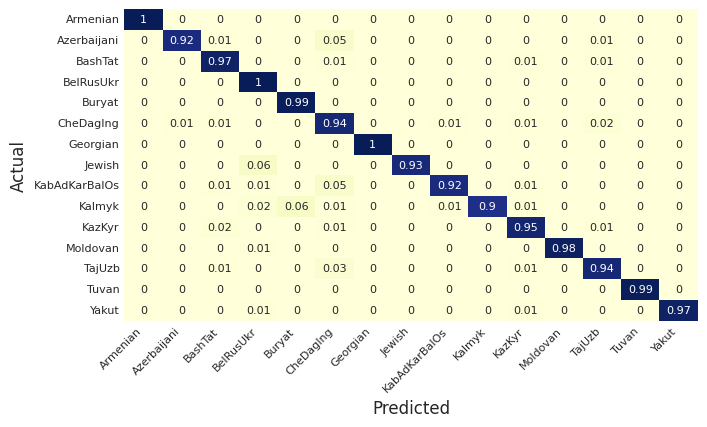

Ethnos          Acc	Prec	Rec	F1
Armenian       	0.9998	0.9972	0.9988	0.9980
Azerbaijani    	0.9946	0.9616	0.9214	0.9411
BashTat        	0.9903	0.9610	0.9681	0.9645
BelRusUkr      	0.9953	0.9805	0.9954	0.9879
Buryat         	0.9987	0.9833	0.9891	0.9862
CheDagIng      	0.9824	0.8872	0.9371	0.9115
Georgian       	0.9999	0.9992	0.9994	0.9993
Jewish         	0.9982	0.9856	0.9337	0.9590
KabAdKarBalOs  	0.9953	0.9624	0.9243	0.9430
Kalmyk         	0.9989	0.9919	0.9024	0.9451
KazKyr         	0.9908	0.9619	0.9540	0.9579
Moldovan       	0.9991	0.9957	0.9845	0.9900
TajUzb         	0.9881	0.9557	0.9365	0.9460
Tuvan          	0.9998	0.9979	0.9940	0.9959
Yakut          	0.9997	0.9984	0.9730	0.9855


{'accuracy': 0.965471655836881,
 'precision macro': 0.9746309345212218,
 'recall macro': 0.9607766146473165,
 'f1 macro': 0.9673901613962835}

In [14]:
test_model(clf_agr, le_a, X_train_a, y_train_a)

In [ ]:
y_pred_a = clf_agr.predict(X_test_a)
y_prob_a = clf_agr.predict_proba(X_test_a)

In [ ]:
show_insecure_correct_preds(X_test_a, y_test_a, y_pred_a, y_prob_a, le_a, 0.35)

In [ ]:
show_secure_incorrect_preds(X_test_a, y_test_a, y_pred_a, y_prob_a, le_a, 0.6)

In [ ]:
show_secure_incorrect_preds(X_test_a, y_test_a, y_pred_a, y_prob_a, le_a, 0.9)

In [ ]:
le_a, X_train_a, X_test_a, y_train_a, y_test_a = split_data(df_translit_ru_agr, test_size=0.0)
clf_agr = Pipeline(steps=[
    ('vect', TfidfVectorizer(analyzer='char', ngram_range=(1, 5), max_df=0.45, min_df=1, lowercase=False)),
    ('estimator', SGDClassifier(alpha=1e-05, class_weight=None, early_stopping=False, loss='modified_huber', 
                                penalty='elasticnet', random_state=0))])
clf_agr.fit(X_train_a, y_train_a)

# Save models

In [15]:
save_pkl('models/all_classes_model.pkl', clf)

In [16]:
save_pkl('models/aggregated_classes_model.pkl', clf_agr)

In [17]:
save_pkl('models/label_encoder.pkl', le)

In [18]:
save_pkl('models/aggregated_label_encoder.pkl', le_a)